# Intern Screening Dataset EDA
In this notebook we will analize the data provided in `intern_screening_dataset.csv` to understand and identify possible patterns to be used later during develpment/deployment

In [71]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
# load dataset from raw file
dataset_df = pd.read_csv("../data/raw/intern_screening_dataset.csv")

dataset_df.head()

,question,answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...
2,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...
3,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...
4,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl..."


In [5]:
dataset_df.shape

(16406, 2)

In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16406 entries, 0 to 16405
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  16406 non-null  object
 1   answer    16401 non-null  object
dtypes: object(2)
memory usage: 256.5+ KB


In [ ]:
# we have questions with null answer (we may need to exclude this for training)
dataset_df[dataset_df['answer'].isnull() ]

,question,answer
3587,What is (are) HELLP syndrome ?,NaN
3836,What is (are) X-linked lymphoproliferative syn...,NaN
4196,What is (are) Familial HDL deficiency ?,NaN
4429,What is (are) Emery-Dreifuss muscular dystroph...,NaN
6689,What is (are) Emery-Dreifuss muscular dystroph...,NaN


In [ ]:
#ignore empty answers
dataset_df = dataset_df[~dataset_df['answer'].isnull()].copy()
# compute extra features
dataset_df['question_len'] = dataset_df['question'].str.len()
dataset_df['question_words'] = dataset_df['question'].str.split().apply(len)
dataset_df['answer_len'] = dataset_df['answer'].str.len()
dataset_df['answer_words'] = dataset_df['answer'].str.split().apply(len)


array([[<Axes: title={'center': 'question_words'}>,
        <Axes: title={'center': 'answer_words'}>]], dtype=object)

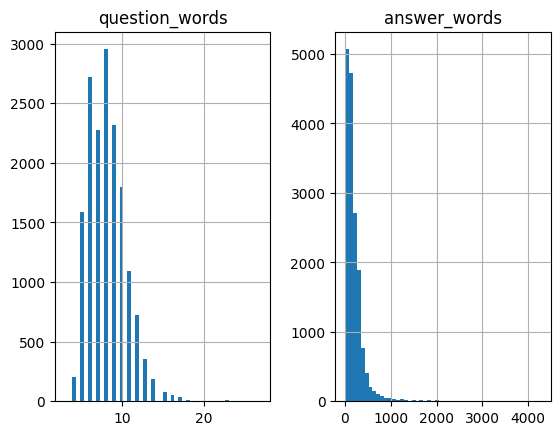

In [20]:
# see question/answer distributions
dataset_df[['question_words', 'answer_words']].hist(bins=50)

array([[<Axes: title={'center': 'question_len'}>,
        <Axes: title={'center': 'answer_len'}>]], dtype=object)

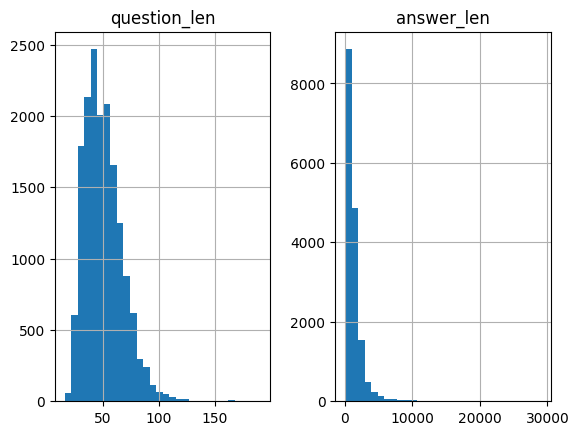

In [17]:
dataset_df[['question_len', 'answer_len']].hist(bins=30)

In [56]:
# identify edge cases (i.e. very short/large questions/answers)

short_question = 3
long_question = 20

short_answer = 5
long_answer = 500

pd.set_option('display.max_colwidth', None)

In [ ]:
#seems like a regular question
dataset_df[dataset_df['question_words']<=short_question]['question']


8060    what is botulism?
Name: question, dtype: object

In [46]:
dataset_df[dataset_df['question_words']>=long_question]['question']

15942                                                                                              What is (are) Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
15943                                                                                             How to prevent Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
15944                                                                                              What is (are) Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
15945                                                                                   What are the symptoms of Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
15946                                                                                        Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabete

In [ ]:
# questions like this makes me think that this dataset was synthetically augmented from base questions to handle variants like what/who/etc.
dataset_df.iloc[15937:15945]['question']

15942               What is (are) Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
15943              How to prevent Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
15944               What is (are) Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
15945    What are the symptoms of Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
15946         Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes? ?
15947         Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes? ?
15948         Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes? ?
15949              What to do for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
Name: question, dtype: o

In [ ]:
# there are some answers that are repeating the questions, we need to clean this for training
dataset_df[dataset_df['answer_words']<=short_answer]

,question,answer,question_len,question_words,answer_len,answer_words
2556,What causes Bell's palsy ?,What causes Bell's palsy?,26,5,25,4
3080,"Is 48,XXYY syndrome inherited ?","Can 48,XXYY syndrome be inherited?",31,5,34,5
3124,Is Wolff-Parkinson-White syndrome inherited ?,Is Wolff-Parkinson-White syndrome inherited?,45,5,44,4
3135,Is Williams syndrome inherited ?,Is Williams syndrome inherited?,32,5,31,4
5782,Is Septo-optic dysplasia inherited ?,Is septo-optic dysplasia inherited?,36,5,35,4
5860,Is Pelizaeus-Merzbacher disease inherited ?,How is Pelizaeus-Merzbacher disease inherited?,43,5,46,5
7977,How to prevent Acanthamoeba - Granulomatous Amebic Encephalitis (GAE); Keratitis ?,Topics,82,11,6,1
8001,What is (are) Parasites - African Trypanosomiasis (also known as Sleeping Sickness) ?,Frequently Asked Queestions (FAQs),85,13,34,4
8041,What is (are) Parasites - Paragonimiasis (also known as Paragonimus Infection) ?,Frequently Asked Queestions (FAQs),80,12,34,4


# Verify answers that seems to be repeating questions

In [ ]:
# identify ? in answers
dataset_df['answer'].str.contains(r'\?').value_counts()

answer
False    12161
True      4240
Name: count, dtype: int64

In [66]:
# this seems high but not all answers that contain ? are bad answers
dataset_df[dataset_df['answer'].str.contains(r'\?')].head(3)

question  \
10     What is (are) High Blood Pressure ?   
20   How to diagnose High Blood Pressure ?   
40  What causes Urinary Tract Infections ?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

#### Note:
Based on the results above, some answers contain ? but necesarly are wrong, a better approach is to check if the answer ends in ?

In [67]:
dataset_df['answer'].str.strip().str.endswith('?').value_counts()

answer
False    16369
True        32
Name: count, dtype: int64

In [69]:
dataset_df[dataset_df['answer'].str.strip().str.endswith('?')].head(5)

question  \
20          How to diagnose High Blood Pressure ?   
84            What is (are) Problems with Taste ?   
128  What is (are) Medicare and Continuing Care ?   
236                What is (are) Kidney Disease ?   
238  What are the treatments for Kidney Disease ?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

# verify if all questions are valid
simple logic to detect correct questions. 

i.e. 

- if istarts with Wh-word, can, could, do, have
- or if ends with ?

In [84]:
def valid_question(text:str) -> bool:
    doc = nlp(text.strip())
    if not doc:
        return False
    # if first token is what why etc it may be a question
    if doc[0].tag_ in ["WP", "WRB", "MD", "VBP"]:
        return True
    # if ends with ?
    if text.strip().endswith("?"):
        return True
    return False

# simple sanity check
(valid_question("What is a question"), 
 valid_question("What is a question?"), 
 valid_question("is a question"), 
 valid_question("is a question?"))

(True, True, False, True)

In [85]:
dataset_df['valid_question'] = dataset_df['question'].apply(valid_question)

In [ ]:
# this shows that all questions are valid, but as we saw some seems to be synthetically created/augmented
dataset_df['valid_question'].value_counts()

valid_question
True    16401
Name: count, dtype: int64

In [88]:
dataset_df[~dataset_df['valid_question']]["question"]

Series([], Name: question, dtype: object)

#### Note:
Based on the results above all questions seems to be correctly formated (based on our simple identification function), however we know that some of these questions were created synthetically 

for example:

- What is (are) Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
- How to prevent Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
- What is (are) Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
- What are the symptoms of Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?
- Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes? ?
- Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes? ?
- Who is at risk for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes? ?
- What to do for Am I at Risk for Type 2 Diabetes? Taking Steps to Lower Your Risk of Getting Diabetes ?

# identify duplicate questions/answers

In [89]:
dataset_df['question'].value_counts().head(10)

question
What causes Causes of Diabetes ?                                           20
What is (are) High Blood Cholesterol ?                                     19
What is (are) Medicare and Continuing Care ?                               14
What is (are) Stroke ?                                                     13
What is (are) Skin Cancer ?                                                13
What is (are) Kidney Failure: Eat Right to Feel Right on Hemodialysis ?    12
What is (are) Colorectal Cancer ?                                          12
What are the treatments for Breast Cancer ?                                12
What is (are) Breast Cancer ?                                              12
What is (are) High Blood Pressure ?                                        11
Name: count, dtype: int64

In [99]:
dataset_df['answer'].value_counts().head(10)

answer
This condition is inherited in an autosomal recessive pattern, which means both copies of the gene in each cell have mutations. The parents of an individual with an autosomal recessive condition each carry one copy of the mutated gene, but they typically do not show signs and symptoms of the condition.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

#### Note:

Based on the results above, we can see that the answer:

`This condition is inherited in an autosomal recessive pattern, which means both copies of the gene in each cell have mutations. The parents of an individual with an autosomal recessive condition each carry one copy of the mutated gene, but they typically do not show signs and symptoms of the condition.`

is used `348` times

In [105]:
most_used_answer = dataset_df['answer'].value_counts().head(1).reset_index()["answer"][0]
dataset_df[dataset_df['answer'] == most_used_answer]

,question,answer,question_len,question_words,answer_len,answer_words,valid_question
9799,Is Rabson-Mendenhall syndrome inherited ?,This condition is inherited in an autosomal re...,41,5,303,51,True
9809,Is North American Indian childhood cirrhosis i...,This condition is inherited in an autosomal re...,56,8,303,51,True
9834,Is infantile-onset spinocerebellar ataxia inhe...,This condition is inherited in an autosomal re...,53,6,303,51,True
9839,Is succinyl-CoA:3-ketoacid CoA transferase def...,This condition is inherited in an autosomal re...,65,7,303,51,True
9854,Is DOLK-congenital disorder of glycosylation i...,This condition is inherited in an autosomal re...,56,7,303,51,True
...,...,...,...,...,...,...,...
15134,Is leptin receptor deficiency inherited ?,This condition is inherited in an autosomal re...,41,6,303,51,True
15149,Is Tangier disease inherited ?,This condition is inherited in an autosomal re...,30,5,303,51,True
15164,Is DOORS syndrome inherited ?,This condition is inherited in an autosomal re...,29,5,303,51,True
15194,Is ALG6-congenital disorder of glycosylation i...,This condition is inherited in an autosomal re...,56,7,303,51,True


# Final Thoughts

Based on this quick data analysis, we found the following:

- we have 16406 records in total
- we have questions w/o answers
- some questions seems to be generated synthetically (i.e. there are some variations on what/why/how/etc.)
- all questions seems to be correct (they start with wh-word/do/could/etc and end in ?)
- some answers are not valid: 
    - some repeat a lot of following questions
    - some repeat the same questions that was asked
- there is an answer that is used for 348 questions
- there are some questions with different answers

#### Action plan:

We are going to make an asumption: "this are real life answers to questions and we want to produce answers that have a similar structure/slang"
based on that will use the training data to capture "the way of answering the questions" rather than to extract valuable information, to augment the model with relevant information we will use a RAG arch. and we will get an open dataset that contains medical information.

For this reason we will filter a subset of the training data taking into account the notes above to produce a smaller/cleanner dataset to finetune a small llm
